# Plot scans

In [1]:
import sys, os
import pandas as pd


In [2]:
from matplotlib import ticker, cm, colors
from matplotlib.lines import Line2D
import matplotlib

In [3]:
# import plotting utils
from os.path import dirname

# sys.path.append( dirname(dirname(os.path.realpath("__file__"))) )
sys.path.append( "/data/user/nlad/NNMFitStuff" )

# from utils.plot_utils import plot_hist_errorbar,plot_ratio_errorbar,initialize_figure, make_hist_error, make_hist2d_error,savefig

# load and set matplotlib parameters
%matplotlib inline
# from utils import matplotlib_setup
# from utils.plot_utils import savefig

In [4]:
import matplotlib as mpl

rcParams = {
            "axes.titlesize": 16,
            "axes.labelsize": 14,
            "xtick.labelsize": 14,
            "ytick.labelsize": 14,
            }

mpl.rcParams.update(rcParams)


In [6]:
import pickle
import numpy as np

In [7]:
from scipy.interpolate import griddata as scipyGrid
import matplotlib.pyplot as plt

In [8]:
import glob

from matplotlib import ticker, cm, colors
from matplotlib.lines import Line2D

### scan handler

In [9]:
from NNMFit.utilities import ScanHandler

In [10]:
#HESE_bestfit
#Northern_Track_bestfit

In [11]:
from utils.FlavourScansPlotting import get_contour_points, plot_confidence_intervals

In [12]:
scan_dir_dict = {
    


    "Data_Poisson":

    '/data/ana/Diffuse/GlobalFit_Flavor/FitResults/Data/HESE12/SPL/Poisson/fitscans/final_results/',
    

    "Data_SAY":
    '/data/ana/Diffuse/GlobalFit_Flavor/FitResults/Data/HESE12/SPL/SAY/LvsE_largebins/kdefits/with_mgunprior/with_double_gradients/prioronholeice/',
    

    "Asimov_Poisson":
 
  '/data/ana/Diffuse/GlobalFit_Flavor/FitResults/Simulation/fit_scans/Poisson/LvsE_LargeBins/KDEFits/5systpriors/' ,
    
    "Asimov_SAY":
    
#     '/data/ana/Diffuse/GlobalFit_Flavor/FitResults/Simulation/fit_scans/SAY/LvsE_LargeBins/KDEFits/5systpriors/'
'/data/ana/Diffuse/GlobalFit_Flavor/FitResults/Simulation/fit_scans/SAY/LvsE_LargeBins/KDEFits/5systpriors_atHESE7Bestfit_asimov/'

}

In [12]:
# scan_dir_dict = {
    

# "Priors":

# '/data/ana/Diffuse/GlobalFit_Flavor/FitResults/Data/HESE12/SPL/SAY/LvsE_largebins/kdefits/with_mgunprior/with_double_gradients/prioronholeice/',
#  #'/data/ana/Diffuse/GlobalFit_Flavor/FitResults/Simulation/fit_scans/SAY/LvsE_LargeBins/KDEFits/5systpriors',
#   #'/data/ana/Diffuse/GlobalFit_Flavor/FitResults/Simulation/fit_scans/SAY/LvsE_LargeBins/KDEFits/DetSystatNominal/',
    
#     "No_Priors":
#  #'/data/ana/Diffuse/GlobalFit_Flavor/FitResults/Data/HESE12/SPL/SAY/LvsE_largebins/kdefits/with_mgunprior/with_double_gradients/'
#   '/data/ana/Diffuse/GlobalFit_Flavor/FitResults/Simulation/fit_scans/SAY/LvsE_LargeBins/KDEFits/5systpriors/' 
# }

In [11]:
scan_dir_dict.keys()

dict_keys(['Data_Poisson', 'Data_SAY', 'Asimov_Poisson', 'Asimov_SAY'])

In [14]:
scan_dir_dict

{'Data_Poisson': '/data/ana/Diffuse/GlobalFit_Flavor/FitResults/Data/HESE12/SPL/Poisson/fitscans/final_results/',
 'Data_SAY': '/data/ana/Diffuse/GlobalFit_Flavor/FitResults/Data/HESE12/SPL/SAY/LvsE_largebins/kdefits/with_mgunprior/with_double_gradients/prioronholeice/',
 'Asimov_Poisson': '/data/ana/Diffuse/GlobalFit_Flavor/FitResults/Simulation/fit_scans/Poisson/LvsE_LargeBins/KDEFits/5systpriors/',
 'Asimov_SAY': '/data/ana/Diffuse/GlobalFit_Flavor/FitResults/Simulation/fit_scans/SAY/LvsE_LargeBins/KDEFits/5systpriors_atHESE7Bestfit_asimov/'}

In [13]:
scan_dict = {}

for name, scan_dir in scan_dir_dict.items():
    print(name)
    # use force_read if new scan points are produced
    scan_dict[name] = ScanHandler(scan_dir ,dump=False,drop_unsuccessful=True)

Data_Poisson
Data_SAY
Asimov_Poisson
Asimov_SAY


In [14]:
import matplotlib.font_manager as font_manager
font_axis_label = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 22,
        }
font_title = {'family': 'serif',
        'color':  'black',
        'weight': 'bold',
        'size': 20,
        }
font_legend = font_manager.FontProperties(family='serif',
                                   weight='normal',
                                   style='normal', size=13)

In [15]:
points = pd.read_pickle(
'/home/rnaab/analysis/GlobalFit_analysis/results_step3/combined/astro_models/default_custom_scan_points_flavor.pickle'
)

In [16]:
path = '/data/ana/Diffuse/GlobalFit_Flavor/FitResults/Simulation/pseudoexperiments/Poisson/LvsE_LargeBins/ConfInt_Estimations'
check_PEs = pd.read_pickle(
'/data/ana/Diffuse/GlobalFit_Flavor/FitResults/Simulation/pseudoexperiments/Poisson/LvsE_LargeBins/ConfInt_Estimations/PseudoTrials_Intervals_updated030624.pickle '
)


In [19]:
# ft_no,fe_no,ts_grid_no = plot_confidence_intervals(nue=check_PEs['nue'],nutau=check_PEs['nutau'],\
#                                                   level=check_PEs['intervals'])


In [17]:
def plot_confidence_intervals(nue,nutau,level):
    numu = np.ones_like(nue)
    norm = nue + numu + nutau
    fe = nue/norm
    fmu = numu/norm
    ftau = nutau/norm
    
    astro_nutau_ratiof = np.linspace(0.0, 0.99, 20)
    astro_nue_ratiof = np.linspace(0.0,0.99, 20)
    
    levels_gridded = scipyGrid((ftau, fe), 
                           (level), (astro_nutau_ratiof[None,:], astro_nue_ratiof[:,None]),\
                           rescale=False, method = 'linear', fill_value=np.nan)
                                                   
                                                   
    
    return fe,ftau,astro_nutau_ratiof,astro_nue_ratiof,levels_gridded
    #return ftau,fe,levels_gridded

In [18]:
from utils.flavor_fracs import flavor_frac,flavour_scale_factors

In [19]:
flavs = flavor_frac(np.asarray(check_PEs['nue']),np.asarray(check_PEs['nutau']))
# flavs[0],flavs[1],flavs[2]

In [23]:
# ftau_data,fe_data,ft_grid_data,fe_grid_data,ts_grid_data = get_contour_points(scan_dict,'')
# # fe_PE,ftau_PE,ft_grid_PE,fe_grid_PE,levels_grid_PE = plot_confidence_intervals(nue=check_PEs['nue'],\
# #                                                                          nutau=check_PEs['nutau'],\
# #                                                                           level=check_PEs['intervals'])
# # fe_PE,ftau_PE,ft_grid_PE,fe_grid_PE,levels_grid_PE = plot_confidence_intervals(nue=nue_68,\
# #                                                                          nutau=nutau_68,\
# #                                                                           level=intervals_68)
# ftau_sim,fe_sim,ft_grid_sim,fe_grid_sim,ts_grid_sim = get_contour_points(scan_dict,'No_Priors')

In [20]:
ftau_data_poisson,fe_data_poisson,ft_grid_data_poisson,fe_grid_data_poisson,ts_grid_data_poisson = get_contour_points(scan_dict,'Data_Poisson')


ftau_data_say,fe_data_say,ft_grid_data_say,fe_grid_data_say,ts_grid_data_say = get_contour_points(scan_dict,'Data_SAY')


ftau_asimov_poisson,fe_asimov_poisson,ft_grid_asimov_poisson,fe_grid_asimov_poisson,ts_grid_asimov_poisson = get_contour_points(scan_dict,'Asimov_Poisson')


ftau_asimov_say,fe_asimov_say,ft_grid_asimov_say,fe_grid_asimov_say,ts_grid_asimov_say = get_contour_points(scan_dict,'Asimov_SAY')


/data/user/nlad/NNMFitStuff/utils/Ternary.py:74: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  ax.xaxis.grid(*args, **kwargs)
/tmp/ipykernel_36515/2367878258.py:47: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  l3 = tax.legend(title=r'$f_{e}:f_{\mu}:f_{\tau}$ at source',


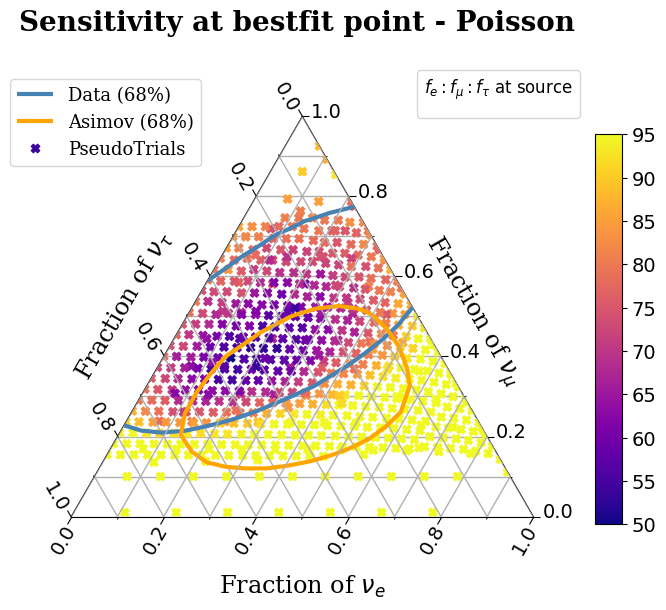

In [21]:
from utils.Ternary import flavor_triangle
plt.rcParams["figure.figsize"] = (6,6)
levels = [2.37]#,5.99]#,4.605]#4.605#, 5.99]
levlabels = ['68%']#,'95%']#'90% CL']#,'95% CL']
percent_levels=[68,95]#,95]
    

fig = plt.figure()
tax = flavor_triangle()

lh, ll = [], []


C2 = tax.ca.contour(ft_grid_data_poisson,fe_grid_data_poisson,ts_grid_data_poisson , levels,
                   linestyles=["-",":"],
                linewidths=3,colors='steelblue')
C3 = tax.ca.contour(ft_grid_asimov_say,fe_grid_asimov_say,ts_grid_asimov_say , levels,
                   linestyles=["-",":"],
                linewidths=3,colors='orange')

# h, _ = C1.legend_elements()
# lh.append(h[0])
# ll.append('PseudoTrials')

h, _ = C2.legend_elements()
lh.append(h[0])
ll.append('Data (68%)')

h, _ = C3.legend_elements()
lh.append(h[0])
ll.append('Asimov (68%)')

plt.title('Sensitivity at bestfit point - Poisson \n',y=1.1,fontdict=font_title)

cm = matplotlib.colormaps['plasma']

X = tax.ca.scatter(flavs[2],flavs[0],c=check_PEs['intervals'],marker='X',\
                              vmin=50, vmax=95, cmap=cm)


h, _ = X.legend_elements()
lh.append(h[0])
ll.append('PseudoTrials')
# tax.scatter(ftau_PE,fe_PE,marker='+',color='darkgrey')
cax = plt.axes([1., 0.2, 0.045, 0.65])
plt.colorbar(X,cax=cax)
l3 = tax.legend(title=r'$f_{e}:f_{\mu}:f_{\tau}$ at source',
        bbox_to_anchor=(1.12, 1.12),prop=font_legend,
        title_fontsize=12.)

# cont1 = tax.plot([], [], color="steelblue", ls="-", label="68% C.L.")

# cont2 = tax.plot([], [], color="k", ls=":", label="95% C.L.")
# lh.append(cont1)
# lh.append(cont2)
# ll.append("68% C.L.")
# ll.append("99% C.L.")
l1 = tax.legend(
           lh, ll, bbox_to_anchor=(0.3, 1.1),prop=font_legend,
        title_fontsize=12.)
# l2 = tax.legend(title=r'$f_{e}:f_{\mu}:f_{\tau}$ at source',
#             title_fontsize=11.,
#            prop=font_legend,
#                bbox_to_anchor=(0.3, 1.12))
tax.add_artist(l3)
# tax.add_artist(l1)
#tax.add_artist(l2)

In [22]:
fe_HESE7_68 = [0.469, 0.427, 0.383, 0.307, 0.252, 0.197, 0.153, 0.107, 0.060, 0.024, 0.002, 0.003, 0.054, 0.194, 0.237, 0.298, 0.341, 0.399, 0.459, 0.498, 0.566, 0.613, 0.674, 0.726, 0.753, 0.784, 0.797]
fmu_HESE7_68 = [0.004, 0.022, 0.039, 0.075, 0.103, 0.137, 0.167, 0.200, 0.242, 0.275, 0.301, 0.701, 0.682, 0.603, 0.576, 0.531, 0.499, 0.455, 0.403, 0.368, 0.306, 0.259, 0.195, 0.135, 0.097, 0.044, 0.002]
ftau_HESE7_68 = [0.527, 0.551, 0.578, 0.618, 0.645, 0.666, 0.680, 0.693, 0.698, 0.701, 0.701, 0.297, 0.264, 0.203, 0.187, 0.171, 0.160, 0.147, 0.139, 0.133, 0.128, 0.128, 0.131, 0.139, 0.150, 0.172, 0.202]
ts_HESE7_68 = np.ones_like(fe_HESE7_68)*2.37

fe_HESE7_95 = [0.169, 0.199, 0.241, 0.026, 0.000, 0.004, 0.029, 0.056, 0.084, 0.108, 0.129, 0.148]
fmu_HESE7_95 = [0.043, 0.027, 0.004, 0.138, 0.159, 0.948, 0.931, 0.912, 0.894, 0.875, 0.860, 0.846]
ftau_HESE7_95 = [0.788, 0.774, 0.755, 0.836, 0.841, 0.049, 0.041, 0.032, 0.022, 0.016, 0.011, 0.006]
ts_HESE7_95 = np.ones_like(fe_HESE7_95)*5.99



In [23]:
fe_HESE7_final_68 = [0.438, 0.398, 0.346, 0.270, 0.199, 0.157, 0.119, 0.100, 0.084, 0.085, 0.101, 0.137, 0.173, 0.216, 0.258, 0.318, 0.396, 0.452, 0.519, 0.581, 0.633, 0.691, 0.823, 0.867]
fmu_HESE7_final_68 = [0.000, 0.021, 0.049, 0.098, 0.157, 0.199, 0.258, 0.296, 0.363, 0.411, 0.459, 0.504, 0.517, 0.514, 0.504, 0.481, 0.438, 0.401, 0.356, 0.307, 0.261, 0.207, 0.065, 0.002]
ftau_HESE7_final_68 = [0.562, 0.581, 0.605, 0.631, 0.645, 0.645, 0.623, 0.604, 0.553, 0.504, 0.440, 0.359, 0.310, 0.270, 0.238, 0.200, 0.165, 0.147, 0.125, 0.112, 0.107, 0.102, 0.113, 0.132]
ts_HESE7_final_68 = np.ones_like(fe_HESE7_final_68)*2.37



fe_HESE7_final_95 = [0.255, 0.155, 0.108, 0.069, 0.038, 0.018, 0.008, 0.005, 0.002, 0.002, 0.003, 0.007, 0.009, 0.017, 0.034, 0.061, 0.113, 0.279, 0.327]
fmu_HESE7_final_95 = [0.003, 0.071, 0.113, 0.157, 0.210, 0.260, 0.301, 0.354, 0.388, 0.448, 0.496, 0.542, 0.586, 0.635, 0.680, 0.721, 0.746, 0.693, 0.667]
ftau_HESE7_final_95 = [0.742, 0.774, 0.779, 0.774, 0.752, 0.722, 0.690, 0.642, 0.609, 0.550, 0.501, 0.450, 0.404, 0.348, 0.286, 0.218, 0.140, 0.028, 0.006]
ts_HESE7_final_95 = np.ones_like(fe_HESE7_final_95)*5.99

In [24]:
def grided_TS_nutau_nue(astro_nutau_ratio, astro_nue_ratio, TS_vals, N_grid = 17, interp_method= "linear"):
    astro_nutau_ratiof = np.linspace(astro_nutau_ratio.min(), astro_nutau_ratio.max(), N_grid)
    astro_nue_ratiof = np.linspace(astro_nue_ratio.min(), astro_nue_ratio.max(), N_grid)
    
    TS_gridded = scipyGrid((astro_nutau_ratio, astro_nue_ratio), 
                           (TS_vals), (astro_nutau_ratiof[None,:], astro_nue_ratiof[:,None]),\
                           rescale=False, method = interp_method, fill_value=np.nan)
                                                   
                                                   
    
    return astro_nutau_ratiof,astro_nue_ratiof,TS_gridded

def getHESE7_contour(nue,nutau,ts):
    
    
    
    
    numu = np.ones_like(nue)
    norm = nue + numu + nutau
    fe = nue/norm
    fmu = numu/norm
    ftau = nutau/norm
    
    ftau_grid,fe_grid,ts_grid = grided_TS_nutau_nue(nutau,nue,ts,interp_method='linear', N_grid=18)
    
    
    return ftau_grid,fe_grid,ts_grid

In [25]:
from utils.Ternary import flavor_triangle
from labellines import labelLines
plt.rcParams["figure.figsize"] = (6,6)
plt.rcParams.update({'font.family':'serif'})
levels = [2.37]#,5.99]#,4.605]#4.605#, 5.99]
levlabels = ['68%']#,'95%']#'90% CL']#,'95% CL']
percent_levels=[68,95]#,95]
    

fig = plt.figure()
tax = flavor_triangle()

lh, ll = [], []
C2 = tax.ca.contour(ft_grid_asimov_poisson,fe_grid_asimov_poisson,ts_grid_asimov_poisson , levels,
                   linestyles=["-",':'],linewidths=3,
                colors='black')

C3 = tax.ca.contour(ft_grid_asimov_say,fe_grid_asimov_say,ts_grid_asimov_say , levels,
                   linestyles=["-",':'],linewidths=3,
                colors='steelblue')

Y = tax.ca.scatter(0.38,0.19258492887645667, marker='*', s=200, facecolors='black',
            edgecolors='k', linewidth=1)

#0.1639344262295082, 0.4821600771456124, 0.35390549662487947
Z = tax.ca.scatter(0.35390549662487947,0.1639344262295082, marker='*', s=200, facecolors='steelblue',
            edgecolors='steelblue', linewidth=1)

# C3 = tax.ca.plot(fe_HESE7_68[:11],fmu_HESE7_68[:11],
#                    linestyle="-",
#                 linewidth=3,color='steelblue',label='68%')
# tax.ca.plot(fe_HESE7_68[11:],fmu_HESE7_68[11:],
#                    linestyle="-",
#                 linewidth=3,color='steelblue',label='68%')
# X = tax.ca.scatter(0.28,0.29, marker='*', s=200, facecolors='steelblue',
#             edgecolors='steelblue', linewidth=1)

# C4 = tax.ca.plot(fe_HESE7_final_68,fmu_HESE7_final_68,
#                    linestyle="-",
#                 linewidth=3,color='orange',label='68%')
# W = tax.ca.scatter(0.42,0.20, marker='*', s=200, facecolors='orange',
#             edgecolors='orange', linewidth=1)

# tax.ca.plot(fe_HESE7_final_95,fmu_HESE7_final_95,
#                    linestyle=":",
#                 linewidth=3,color='orange',label='95%')
# tax.ca.plot(fe_HESE7_final_95,fmu_HESE7_final_95,
#                    linestyle=":",
#                 linewidth=3,color='orange',label='95%')


h, _ = C2.legend_elements()
lh.append(h[0])
ll.append('HESE-12 \n(Poisson llh)')


h, _ = C3.legend_elements()
lh.append(h[0])
ll.append('HESE-12 \n(SAY llh)')

# lh.append(C3[0])
# ll.append('HESE-7.5 \n(non extended likelihood)')
# lh.append(C4[0])
# ll.append('HESE-7.5 \n(extended likelihood)')

lh.append(Y)
ll.append('Best fit \n0.19:0.43:0.38')



#0.1639344262295082, 0.4821600771456124, 0.35390549662487947
lh.append(Z)
ll.append('Best fit \n0.16:0.48:0.35')

# lh.append(X)
# ll.append('Bestfit \n0.29:0.43:0.28')

# lh.append(W)
# ll.append('Bestfit \n0.20:0.39:0.42')





# legend0 = tax.ca.scatter([0], [0], marker='+', facecolor='white',
#                   edgecolor='w', lw=0.5, s=10)
# lh.append(legend0)
# ll.append(r'$f_{e}:f_{\mu}:f_{\tau}$ at source --> on Earth')
# legend1=tax.ca.scatter([0.34], [0.30], marker='o', facecolor='forestgreen',
#                   edgecolor='k', lw=0.5, s=80)
# lh.append(legend1)
# ll.append('1:2:0 --> 0.30 : 0.36 : 0.34')

# legend2=tax.ca.scatter([0.38], [0.19], marker='s', facecolor='darkorange',
#               edgecolor='k', lw=0.5, s=80)
# lh.append(legend2)
# ll.append('0:1:0 --> 0.19 : 0.43 : 0.38')
# legend3=tax.ca.scatter([0.28], [0.55], marker='^', facecolor='darkblue',
#               edgecolor='k', lw=0.5, s=80)
# lh.append(legend3)
# ll.append('1:0:0 --> 0.55 : 0.17 : 0.28')

# cax = plt.axes([1., 0.2, 0.045, 0.65])
# cbar = plt.colorbar(X,cax=cax,spacing='proportional',
#     label='Confidence region (%)')


l3 = fig.legend(lh,ll,
        bbox_to_anchor=(1., 0.05),prop=font_legend,
        ncols=2,frameon=True,fancybox=True,shadow=True)


fmt={}
for l, s in zip(C2.levels, levlabels):
    fmt[l] = s
plt.clabel(C2,levels,inline=True,fontsize=12.,
           fmt=fmt,colors='black')

fmt={}
for l, s in zip(C3.levels, levlabels):
    fmt[l] = s
plt.clabel(C3,levels,inline=True,fontsize=12.,
           fmt=fmt,colors='steelblue')

labelLines(plt.gca().get_lines(), zorder=2.5)

tax.add_artist(l3)



#save the figure
# path = '/home/nlad/Thesis_figures/Results/'
# plt.savefig(path+'HESE7and12_extended.pdf',bbox_inches='tight', dpi=500)

ModuleNotFoundError: No module named 'labellines'

In [30]:
0.1639344262295082+0.482160077145612+0.35390549662487947

0.9999999999999997

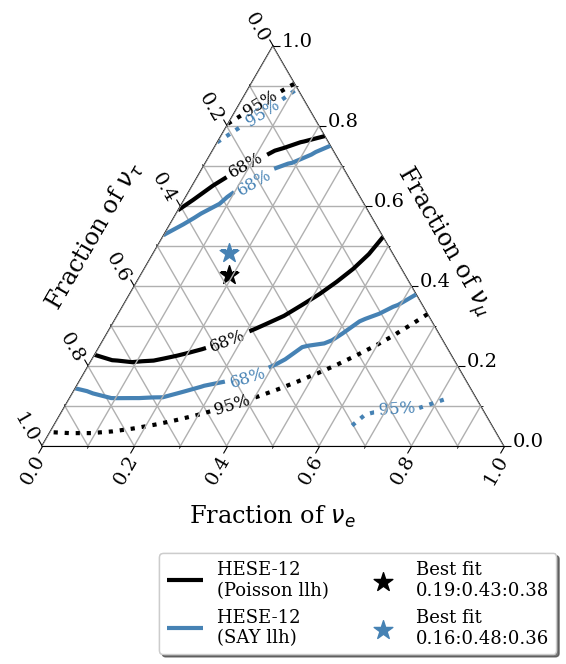

In [31]:
from utils.Ternary import flavor_triangle
from labellines import labelLines
plt.rcParams["figure.figsize"] = (6,6)
plt.rcParams.update({'font.family':'serif'})
levels = [2.37,5.99]#,4.605]#4.605#, 5.99]
levlabels = ['68%','95%']#'90% CL']#,'95% CL']
percent_levels=[68,95]#,95]
    

fig = plt.figure()
tax = flavor_triangle()

lh, ll = [], []
C2 = tax.ca.contour(ft_grid_data_poisson,fe_grid_data_poisson,ts_grid_data_poisson , levels,
                   linestyles=["-",':'],linewidths=3,
                colors='black')

C3 = tax.ca.contour(ft_grid_data_say,fe_grid_data_say,ts_grid_data_say , levels,
                   linestyles=["-",':'],linewidths=3,
                colors='steelblue')

Y = tax.ca.scatter(0.38,0.19258492887645667, marker='*', s=200, facecolors='black',
            edgecolors='k', linewidth=1)

#0.1639344262295082, 0.4821600771456124, 0.35390549662487947
Z = tax.ca.scatter(0.35390549662487947,0.1639344262295082, marker='*', s=200, facecolors='steelblue',
            edgecolors='steelblue', linewidth=1)

# C3 = tax.ca.plot(fe_HESE7_68[:11],fmu_HESE7_68[:11],
#                    linestyle="-",
#                 linewidth=3,color='steelblue',label='68%')
# tax.ca.plot(fe_HESE7_68[11:],fmu_HESE7_68[11:],
#                    linestyle="-",
#                 linewidth=3,color='steelblue',label='68%')
# X = tax.ca.scatter(0.28,0.29, marker='*', s=200, facecolors='steelblue',
#             edgecolors='steelblue', linewidth=1)

# C4 = tax.ca.plot(fe_HESE7_final_68,fmu_HESE7_final_68,
#                    linestyle="-",
#                 linewidth=3,color='orange',label='68%')
# W = tax.ca.scatter(0.42,0.20, marker='*', s=200, facecolors='orange',
#             edgecolors='orange', linewidth=1)

# tax.ca.plot(fe_HESE7_final_95,fmu_HESE7_final_95,
#                    linestyle=":",
#                 linewidth=3,color='orange',label='95%')
# tax.ca.plot(fe_HESE7_final_95,fmu_HESE7_final_95,
#                    linestyle=":",
#                 linewidth=3,color='orange',label='95%')


h, _ = C2.legend_elements()
lh.append(h[0])
ll.append('HESE-12 \n(Poisson llh)')


h, _ = C3.legend_elements()
lh.append(h[0])
ll.append('HESE-12 \n(SAY llh)')

# lh.append(C3[0])
# ll.append('HESE-7.5 \n(non extended likelihood)')
# lh.append(C4[0])
# ll.append('HESE-7.5 \n(extended likelihood)')

lh.append(Y)
ll.append('Best fit \n0.19:0.43:0.38')



#0.1639344262295082, 0.4821600771456124, 0.35390549662487947
lh.append(Z)
ll.append('Best fit \n0.16:0.48:0.36')

# lh.append(X)
# ll.append('Bestfit \n0.29:0.43:0.28')

# lh.append(W)
# ll.append('Bestfit \n0.20:0.39:0.42')





# legend0 = tax.ca.scatter([0], [0], marker='+', facecolor='white',
#                   edgecolor='w', lw=0.5, s=10)
# lh.append(legend0)
# ll.append(r'$f_{e}:f_{\mu}:f_{\tau}$ at source --> on Earth')
# legend1=tax.ca.scatter([0.34], [0.30], marker='o', facecolor='forestgreen',
#                   edgecolor='k', lw=0.5, s=80)
# lh.append(legend1)
# ll.append('1:2:0 --> 0.30 : 0.36 : 0.34')

# legend2=tax.ca.scatter([0.38], [0.19], marker='s', facecolor='darkorange',
#               edgecolor='k', lw=0.5, s=80)
# lh.append(legend2)
# ll.append('0:1:0 --> 0.19 : 0.43 : 0.38')
# legend3=tax.ca.scatter([0.28], [0.55], marker='^', facecolor='darkblue',
#               edgecolor='k', lw=0.5, s=80)
# lh.append(legend3)
# ll.append('1:0:0 --> 0.55 : 0.17 : 0.28')

# cax = plt.axes([1., 0.2, 0.045, 0.65])
# cbar = plt.colorbar(X,cax=cax,spacing='proportional',
#     label='Confidence region (%)')


l3 = fig.legend(lh,ll,
        bbox_to_anchor=(1., 0.05),prop=font_legend,
        ncols=2,frameon=True,fancybox=True,shadow=True)


fmt={}
for l, s in zip(C2.levels, levlabels):
    fmt[l] = s
plt.clabel(C2,levels,inline=True,fontsize=12.,
           fmt=fmt,colors='black')

fmt={}
for l, s in zip(C3.levels, levlabels):
    fmt[l] = s
plt.clabel(C3,levels,inline=True,fontsize=12.,
           fmt=fmt,colors='steelblue')

labelLines(plt.gca().get_lines(), zorder=2.5)

tax.add_artist(l3)



#save the figure
# path = '/home/nlad/Thesis_figures/Results/'
# plt.savefig(path+'HESE12_sayvspoisson.pdf',bbox_inches='tight', dpi=500)

In [32]:
fe_HESE7_95,fmu_HESE7_95

([0.169,
  0.199,
  0.241,
  0.026,
  0.0,
  0.004,
  0.029,
  0.056,
  0.084,
  0.108,
  0.129,
  0.148],
 [0.043,
  0.027,
  0.004,
  0.138,
  0.159,
  0.948,
  0.931,
  0.912,
  0.894,
  0.875,
  0.86,
  0.846])

/data/user/nlad/NNMFitStuff/utils/Ternary.py:74: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  ax.xaxis.grid(*args, **kwargs)
/tmp/ipykernel_36515/8840088.py:101: UserWarning: You passed a edgecolor/edgecolors ('w') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  legend0 = tax.ca.scatter([0], [0], marker='+', facecolor='white',


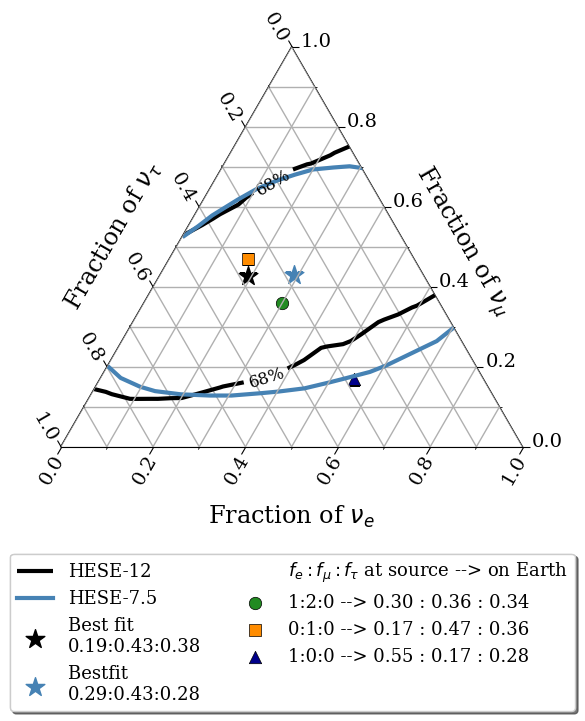

In [30]:
from utils.Ternary import flavor_triangle
# from labellines import labelLines
plt.rcParams["figure.figsize"] = (6,6)
plt.rcParams.update({'font.family':'serif'})
levels = [2.37]#,5.99]#,4.605]#4.605#, 5.99]
levlabels = ['68%']#,'95%']#'90% CL']#,'95% CL']
percent_levels=[68]#,95]#,95]
    

fig = plt.figure()
tax = flavor_triangle()

lh, ll = [], []
C2 = tax.ca.contour(ft_grid_data_say,fe_grid_data_say,ts_grid_data_say , levels,
                   linestyles=["-"],linewidths=3,
                colors='black')



# Y = tax.ca.scatter(0.35390549662487947,0.1639344262295082, marker='*', s=200, facecolors='black',
#             edgecolors='k', linewidth=1)


# C2 = tax.ca.contour(ft_grid_data_poisson,fe_grid_data_poisson,ts_grid_data_poisson , levels,
#                    linestyles=["-",':'],linewidths=3,
#                 colors='black')



Y = tax.ca.scatter(0.38,0.19258492887645667, marker='*', s=200, facecolors='black',
            edgecolors='k', linewidth=1)


C3 = tax.ca.plot(fe_HESE7_68[:11],fmu_HESE7_68[:11],
                   linestyle="-",
                linewidth=3,color='steelblue',label='68%')
tax.ca.plot(fe_HESE7_68[11:],fmu_HESE7_68[11:],
                   linestyle="-",
                linewidth=3,color='steelblue',label='68%')

# C4 = tax.ca.plot(fe_HESE7_95[:5],fmu_HESE7_95[:5],
#                    linestyle=":",
#                 linewidth=3,color='steelblue',label='95%')

# tax.ca.plot(fe_HESE7_95[5:],fmu_HESE7_95[5:],
#                    linestyle=":",
#                 linewidth=3,color='steelblue',label='95%')
# tax.ca.plot(fe_HESE7_final_95,fmu_HESE7_final_95,
#                    linestyle=":",
#                 linewidth=3,color='crimson',label='95%')

X = tax.ca.scatter(0.28,0.29, marker='*', s=200, facecolors='steelblue',
            edgecolors='steelblue', linewidth=1)

# C4 = tax.ca.plot(fe_HESE7_final_68,fmu_HESE7_final_68,
#                    linestyle="-",
#                 linewidth=3,color='crimson',label='68%')
# W = tax.ca.scatter(0.42,0.20, marker='*', s=200, facecolors='crimson',
#             edgecolors='crimson', linewidth=1)


# tax.ca.plot(fe_HESE7_final_95,fmu_HESE7_final_95,
#                    linestyle=":",
#                 linewidth=3,color='crimson',label='95%')


h, _ = C2.legend_elements()
lh.append(h[0])
ll.append('HESE-12')





lh.append(C3[0])
ll.append('HESE-7.5')
# lh.append(C4[0])
# ll.append('HESE-7.5 \n(extended likelihood)')


# HESE12-SAY bestfit
lh.append(Y)
ll.append('Best fit \n0.19:0.43:0.38')

# HESE12-Poisson bestfit
# lh.append(Y)
# ll.append('Best fit \n0.16:0.48:0.36')



lh.append(X)
ll.append('Bestfit \n0.29:0.43:0.28')

# lh.append(W)
# ll.append('Bestfit \n0.20:0.39:0.42')





legend0 = tax.ca.scatter([0], [0], marker='+', facecolor='white',
                  edgecolor='w', lw=0.5, s=10)
lh.append(legend0)
ll.append(r'$f_{e}:f_{\mu}:f_{\tau}$ at source --> on Earth')
legend1=tax.ca.scatter([0.34], [0.30], marker='o', facecolor='forestgreen',
                  edgecolor='k', lw=0.5, s=80)
lh.append(legend1)
ll.append('1:2:0 --> 0.30 : 0.36 : 0.34')

legend2=tax.ca.scatter([0.36], [0.17], marker='s', facecolor='darkorange',
              edgecolor='k', lw=0.5, s=80)
lh.append(legend2)
ll.append('0:1:0 --> 0.17 : 0.47 : 0.36')
legend3=tax.ca.scatter([0.28], [0.55], marker='^', facecolor='darkblue',
              edgecolor='k', lw=0.5, s=80)
lh.append(legend3)
ll.append('1:0:0 --> 0.55 : 0.17 : 0.28')

# cax = plt.axes([1., 0.2, 0.045, 0.65])
# cbar = plt.colorbar(X,cax=cax,spacing='proportional',
#     label='Confidence region (%)')


l3 = fig.legend(lh,ll,
        bbox_to_anchor=(1., 0.05),prop=font_legend,
        ncols=2,frameon=True,fancybox=True,shadow=True)


fmt={}
for l, s in zip(C2.levels, levlabels):
    fmt[l] = s
plt.clabel(C2,levels,inline=True,fontsize=12.,
           fmt=fmt,colors='black')

# labelLines(plt.gca().get_lines(), zorder=2.5)

tax.add_artist(l3)



#save the figure
path = '/data/user/tvaneede/GlobalFit/analysis/icrc_checks/'
plt.savefig(path+'HESE7and12_nonextendedonly.pdf',bbox_inches='tight', dpi=500)

In [34]:
e = [0.077, 0.301, 0.450, 0.600, 0.037, 0.122, 0.214,0.013, 0.648, 0.090, 0.728, 0.808, 0.052]
mu = [0.123, 0.158, 0.252, 0.362, 0.564, 0.656, 0.729,0.779, 0.068, 0.870, 0.093, 0.116, 0.824]
tau = [0.800, 0.541, 0.298, 0.038, 0.399, 0.222, 0.057,0.208, 0.284, 0.040, 0.179, 0.076, 0.124]

In [35]:
nue_frac ,nutau_frac = flavour_scale_factors(np.asarray(e),np.asarray(mu),np.asarray(tau))

In [36]:
flavor_frac(0.29,0.08)

(0.2116788321167883, 0.7299270072992701, 0.058394160583941604)

In [37]:
nue_frac

array([0.62601626, 1.90506329, 1.78571429, 1.65745856, 0.06560284,
       0.18597561, 0.29355281, 0.01668806, 9.52941176, 0.10344828,
       7.82795699, 6.96551724, 0.0631068 ])

In [38]:
nutau_frac

array([6.50406504, 3.42405063, 1.18253968, 0.10497238, 0.70744681,
       0.33841463, 0.0781893 , 0.26700899, 4.17647059, 0.04597701,
       1.92473118, 0.65517241, 0.15048544])

/mnt/ceph1-npx/user/nlad/NNMFitStuff/utils/Ternary.py:74: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  ax.xaxis.grid(*args, **kwargs)
/tmp/ipykernel_7651/732944235.py:60: UserWarning: You passed a edgecolor/edgecolors ('w') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  legend0 = tax.ca.scatter([0], [0], marker='x', facecolor='white',


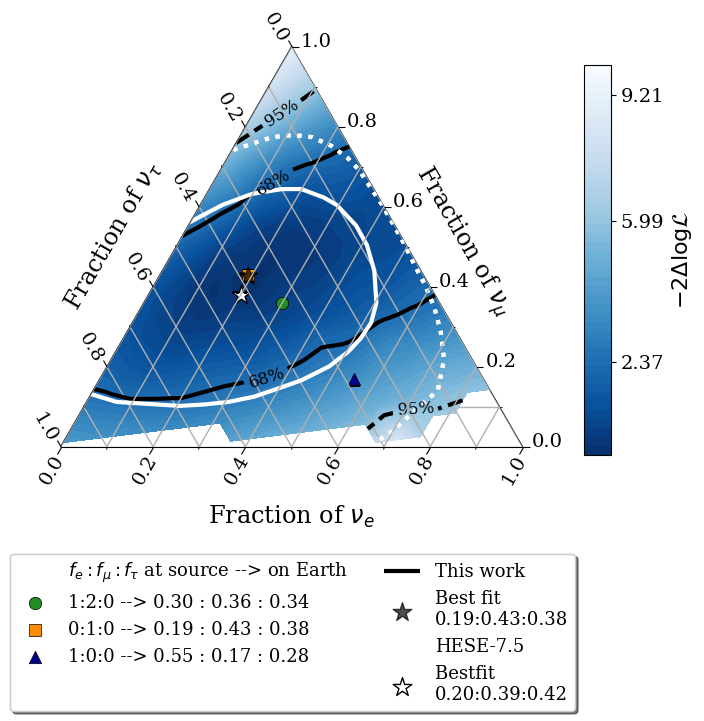

In [56]:
from utils.Ternary import flavor_triangle
from labellines import labelLines
import matplotlib.patheffects as pe
plt.rcParams["figure.figsize"] = (6,6)
plt.rcParams.update({'font.family':'serif'})
levels = [2.37,5.99]#,4.605]#4.605#, 5.99]
levlabels = ['68%','95%']#'90% CL']#,'95% CL']
percent_levels=[68,95]#,95]
    

fig = plt.figure()
tax = flavor_triangle()

lh, ll = [], []


C2 = tax.ca.contour(ft_grid_data_say,fe_grid_data_say,ts_grid_data_say , levels,
                   linestyles=["-",'--'],linewidths=3,
                colors='black')


levs_vals = np.linspace(0,10,num=45)
X = tax.ca.contourf(ft_grid_data_say,fe_grid_data_say,\
                              ts_grid_data_say,levs_vals,cmap= plt.colormaps['Blues_r'])

tax.ca.plot(fe_HESE7_final_95,fmu_HESE7_final_95,
                   linestyle=":",
                linewidth=3,color='white',label='95%')

# X = tax.ca.scatter(0.28,0.29, marker='*', s=200, facecolors='steelblue',
#             edgecolors='steelblue', linewidth=1)

C4 = tax.ca.plot(fe_HESE7_final_68,fmu_HESE7_final_68,
                   linestyle="-",
                linewidth=3,color='white',label='68%')
W = tax.ca.scatter(0.42,0.20, marker='*', s=200, facecolors='white',
            edgecolors='black', linewidth=1)


tax.ca.plot(fe_HESE7_final_95,fmu_HESE7_final_95,
                   linestyle=":",
                linewidth=3,color='white',label='95%')
# Z = tax.ca.scatter(tau,e, marker='X', s=100, facecolors='black',
#             edgecolors='black', linewidth=4,alpha=0.7)




# h, _ = C2.legend_elements()
# lh.append(h[0])
# ll.append('HESE-12')








legend0 = tax.ca.scatter([0], [0], marker='x', facecolor='white',
                  edgecolor='w', lw=0.5, s=10)
lh.append(legend0)
ll.append(r'$f_{e}:f_{\mu}:f_{\tau}$ at source --> on Earth')
legend1=tax.ca.scatter([0.34], [0.30], marker='o', facecolor='forestgreen',
                  edgecolor='k', lw=0.5, s=80)
lh.append(legend1)
ll.append('1:2:0 --> 0.30 : 0.36 : 0.34')

legend2=tax.ca.scatter([0.38], [0.19], marker='s', facecolor='darkorange',
              edgecolor='k', lw=0.5, s=80)
lh.append(legend2)
ll.append('0:1:0 --> 0.19 : 0.43 : 0.38')
legend3=tax.ca.scatter([0.28], [0.55], marker='^', facecolor='darkblue',
              edgecolor='k', lw=0.5, s=80)
lh.append(legend3)
ll.append('1:0:0 --> 0.55 : 0.17 : 0.28')

Y = tax.ca.scatter(0.38,0.19258492887645667, marker='*', s=200, facecolors='black',
            edgecolors='black', linewidth=1,alpha=0.7)

# Y = tax.ca.scatter(0.35390549662487947,0.1639344262295082, marker='*', s=200, facecolors='black',
#             edgecolors='k', linewidth=1)
h, _ = C2.legend_elements()
lh.append(h[0])
ll.append('This work')

lh.append(Y)
ll.append('Best fit \n0.19:0.43:0.38')

lh.append(C4[0])
ll.append('HESE-7.5')
lh.append(W)
ll.append('Bestfit \n0.20:0.39:0.42')

# lh.append(Y)
# ll.append('Best fit \n0.16:0.48:0.36')


cax = plt.axes([1., 0.2, 0.045, 0.65])
cbar = plt.colorbar(X,cax=cax,spacing='proportional',
    ticks=[2.37,5.99,9.21],)
cbar.set_label(label=r'$-2\Delta\mathrm{log}\mathcal{L}$',size=16,fontfamily='serif')
cbar.ax.set_yticklabels(['2.37','5.99','9.21'])  # vertically oriented colorbar

# l3 = fig.legend(lh,ll,
#         bbox_to_anchor=(0.8, 0.05),prop=font_legend,
#         frameon=True,fancybox=True,shadow=True)
l3 = fig.legend(lh,ll,
        bbox_to_anchor=(1., 0.05),prop=font_legend,
        ncols=2,frameon=True,fancybox=True,shadow=True)


fmt={}
for l, s in zip(C2.levels, levlabels):
    fmt[l] = s
plt.clabel(C2,levels,inline=True,fontsize=12.,
           fmt=fmt,colors='black')

labelLines(plt.gca().get_lines(), zorder=2.5)

tax.add_artist(l3)



#save the figure
# path = '/home/nlad/Thesis_figures/Results/'
# plt.savefig(path+'HESE12_fancy_coverage_say_withhese7.pdf',bbox_inches='tight', dpi=500)

In [40]:
cbar.set_label?

/mnt/ceph1-npx/user/nlad/NNMFitStuff/utils/Ternary.py:74: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  ax.xaxis.grid(*args, **kwargs)
/tmp/ipykernel_7651/2577117563.py:40: UserWarning: You passed a edgecolor/edgecolors ('w') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  legend0 = tax.ca.scatter([0], [0], marker='+', facecolor='white',


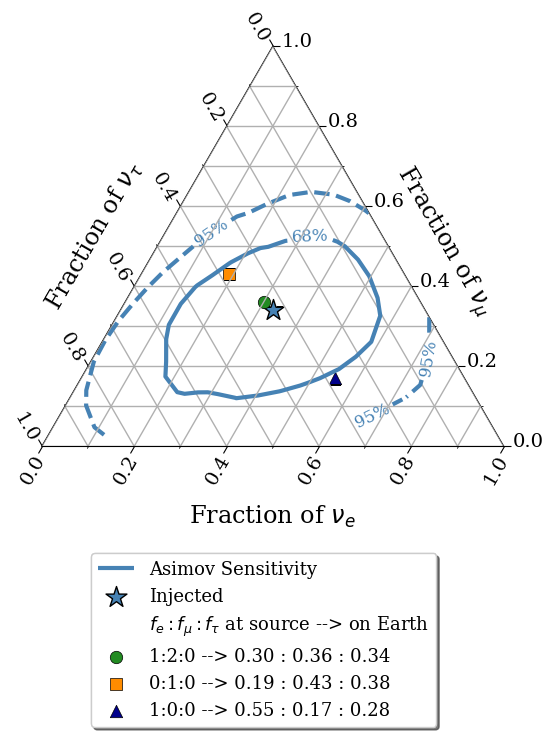

In [41]:
from utils.Ternary import flavor_triangle

plt.rcParams["figure.figsize"] = (6,6)
plt.rcParams.update({'font.family':'serif'})
levels = [2.37,5.99]#,4.065]#4.605#, 5.99]
levlabels = ['68%','95%']#'90% CL']#,'95% CL']
percent_levels=[68,95]#,95]
    

fig = plt.figure()
tax = flavor_triangle()

lh, ll = [], []


C3 = tax.ca.contour(ft_grid_asimov_say,fe_grid_asimov_say,ts_grid_asimov_say , levels,
                   linestyles=["-","--"],
                linewidths=3,colors='steelblue')




h, _ = C3.legend_elements()
lh.append(h[0])
ll.append('Asimov Sensitivity')








Y = tax.ca.scatter(0.33,0.33, marker='*', s=250, facecolors='steelblue',
            edgecolors='k', linewidth=1)

lh.append(Y)
ll.append('Injected')

legend0 = tax.ca.scatter([0], [0], marker='+', facecolor='white',
                  edgecolor='w', lw=0.5, s=10)
lh.append(legend0)
ll.append(r'$f_{e}:f_{\mu}:f_{\tau}$ at source --> on Earth')
legend1=tax.ca.scatter([0.34], [0.30], marker='o', facecolor='forestgreen',
                  edgecolor='k', lw=0.5, s=80)
lh.append(legend1)
ll.append('1:2:0 --> 0.30 : 0.36 : 0.34')

legend2=tax.ca.scatter([0.38], [0.19], marker='s', facecolor='darkorange',
              edgecolor='k', lw=0.5, s=80)
lh.append(legend2)
ll.append('0:1:0 --> 0.19 : 0.43 : 0.38')
legend3=tax.ca.scatter([0.28], [0.55], marker='^', facecolor='darkblue',
              edgecolor='k', lw=0.5, s=80)
lh.append(legend3)
ll.append('1:0:0 --> 0.55 : 0.17 : 0.28')

# cax = plt.axes([1., 0.2, 0.045, 0.65])
# cbar = plt.colorbar(X,cax=cax,spacing='proportional',
#     label='Confidence region (%)')


l3 = fig.legend(lh,ll,
        bbox_to_anchor=(0.8, 0.05),prop=font_legend,
        frameon=True,fancybox=True,shadow=True)
fmt={}
for l, s in zip(C3.levels, levlabels):
    fmt[l] = s
plt.clabel(C3,levels,fontsize=12.,
           fmt=fmt,colors='steelblue')

# labelLines(plt.gca().get_lines(), zorder=2.5)

# l1 = fig.legend(
#            lh, ll, bbox_to_anchor=(0.85, 0.05),prop=font_legend,
#         title_fontsize=12.)

tax.add_artist(l3)



#save the figure
# path = '/home/nlad/Thesis_figures/Analysis/'
# plt.savefig(path+'Asimov_Sensitivity.pdf',bbox_inches='tight', dpi=500)

/tmp/ipykernel_7651/225111818.py:64: UserWarning: You passed a edgecolor/edgecolors ('w') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  legend0 = tax.ca.scatter([0], [0], marker='+', facecolor='white',


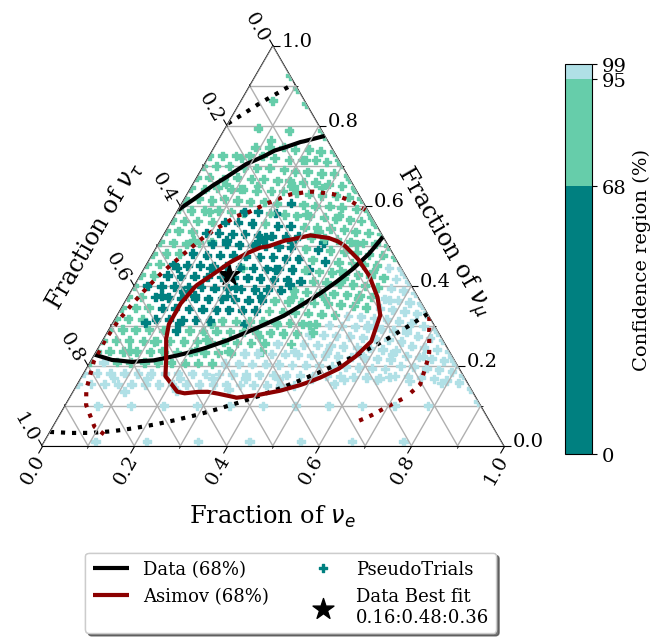

In [42]:
from utils.Ternary import flavor_triangle

plt.rcParams["figure.figsize"] = (6,6)
plt.rcParams.update({'font.family':'serif'})
levels = [2.37,5.99]#,4.065]#4.605#, 5.99]
levlabels = ['68%','95%']#'90% CL']#,'95% CL']
percent_levels=[68,95]#,95]
    

fig = plt.figure()
tax = flavor_triangle()

lh, ll = [], []
C2 = tax.ca.contour(ft_grid_data_poisson,fe_grid_data_poisson,ts_grid_data_poisson , levels,
                   linestyles=["-",":"],
                linewidths=3,colors='black')


C3 = tax.ca.contour(ft_grid_asimov_say,fe_grid_asimov_say,ts_grid_asimov_say , levels,
                   linestyles=["-",":"],
                linewidths=3,colors='darkred')


h, _ = C2.legend_elements()
lh.append(h[0])
ll.append('Data (68%)')



h, _ = C3.legend_elements()
lh.append(h[0])
ll.append('Asimov (68%)')





# plt.title('Sensitivity at bestfit point \n',y=1.1,fontdict=font_title)

# cm = matplotlib.colormaps['plasma']
#cmap = (mpl.colors.ListedColormap(['firebrick','indianred','coral','mistyrose']))
cmap = (mpl.colors.ListedColormap(['teal','mediumaquamarine','paleturquoise','powderblue']))
bounds = [0,68,95,99]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
X = tax.ca.scatter(flavs[2],flavs[0],c=check_PEs['intervals'],marker='P',\
                cmap=cmap,norm=norm)





h, _ = X.legend_elements()

lh.append(h[0])
ll.append('PseudoTrials')


Y = tax.ca.scatter(0.38,0.19258492887645667, marker='*', s=250, facecolors='black',
            edgecolors='k', linewidth=1)

lh.append(Y)
ll.append('Data Best fit \n0.16:0.48:0.36')

legend0 = tax.ca.scatter([0], [0], marker='+', facecolor='white',
                  edgecolor='w', lw=0.5, s=10)
lh.append(legend0)
# ll.append(r'$f_{e}:f_{\mu}:f_{\tau}$ at source --> on Earth')
# legend1=tax.ca.scatter([0.34], [0.30], marker='o', facecolor='forestgreen',
#                   edgecolor='k', lw=0.5, s=80)
# lh.append(legend1)
# ll.append('1:2:0 --> 0.30 : 0.36 : 0.34')

# legend2=tax.ca.scatter([0.38], [0.19], marker='s', facecolor='darkorange',
#               edgecolor='k', lw=0.5, s=80)
# lh.append(legend2)
# ll.append('0:1:0 --> 0.19 : 0.43 : 0.38')
# legend3=tax.ca.scatter([0.28], [0.55], marker='^', facecolor='darkblue',
#               edgecolor='k', lw=0.5, s=80)
# lh.append(legend3)
# ll.append('1:0:0 --> 0.55 : 0.17 : 0.28')

cax = plt.axes([1., 0.2, 0.045, 0.65])
cbar = plt.colorbar(X,cax=cax,spacing='proportional',
    label='Confidence region (%)')


l3 = fig.legend(lh,ll,
        bbox_to_anchor=(0.9, 0.05),prop=font_legend,
        ncols=2,frameon=True,fancybox=True,shadow=True)


# l1 = fig.legend(
#            lh, ll, bbox_to_anchor=(0.85, 0.05),prop=font_legend,
#         title_fontsize=12.)

tax.add_artist(l3)



#save the figure
# path = '/home/nlad/Thesis_figures/Results/'
# plt.savefig(path+'PE_data_asimov_68.pdf',bbox_inches='tight', dpi=500)

In [43]:
h[0]

In [44]:
l3

In [45]:
check_PEs['intervals']

[53.0,
 60.0,
 66.0,
 61.0,
 67.0,
 87.0,
 89.0,
 61.0,
 63.0,
 100.0,
 93.0,
 99.0,
 100.0,
 88.0,
 100.0,
 93.0,
 90.0,
 99.0,
 67.0,
 95.0,
 78.0,
 75.0,
 64.0,
 78.0,
 100.0,
 68.0,
 76.0,
 100.0,
 96.0,
 85.0,
 74.0,
 100.0,
 93.0,
 57.0,
 89.0,
 92.0,
 75.0,
 80.0,
 100.0,
 87.0,
 57.0,
 53.0,
 89.0,
 73.0,
 74.0,
 99.0,
 81.0,
 100.0,
 99.0,
 68.0,
 100.0,
 75.0,
 100.0,
 99.0,
 70.0,
 74.0,
 60.0,
 100.0,
 70.0,
 62.0,
 78.0,
 63.0,
 76.0,
 86.0,
 83.0,
 98.0,
 85.0,
 97.0,
 84.0,
 78.0,
 81.0,
 100.0,
 96.0,
 100.0,
 81.0,
 79.0,
 100.0,
 68.0,
 98.0,
 100.0,
 79.0,
 85.0,
 56.0,
 98.0,
 60.0,
 97.0,
 91.0,
 73.0,
 99.0,
 65.0,
 79.0,
 63.0,
 100.0,
 66.0,
 97.0,
 99.0,
 78.0,
 60.0,
 99.0,
 99.0,
 78.0,
 76.0,
 71.0,
 100.0,
 71.0,
 94.0,
 76.0,
 68.0,
 73.0,
 94.0,
 81.0,
 97.0,
 81.0,
 71.0,
 60.0,
 90.0,
 62.0,
 100.0,
 100.0,
 63.0,
 100.0,
 100.0,
 79.0,
 100.0,
 100.0,
 72.0,
 84.0,
 82.0,
 100.0,
 84.0,
 99.0,
 84.0,
 99.0,
 58.0,
 74.0,
 90.0,
 100.0,
 80.0,
 100.0,
 